In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

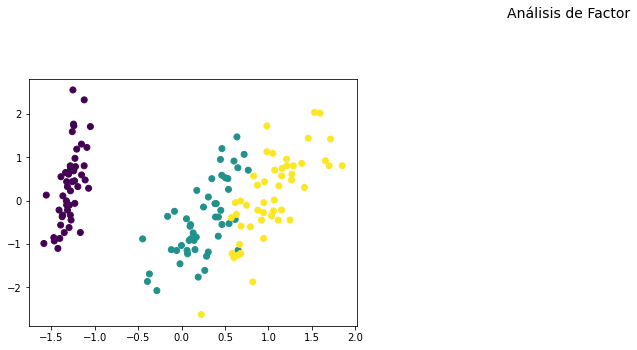

In [97]:
import pandas as pd
import numpy as np
from sklearn import datasets
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
#**************************************************
# Cargando el dataset
iris = datasets.load_iris(as_frame=True)
#**************************************************
#Estandarización de las variables
scaler = StandardScaler()
iris_scalado = scaler.fit_transform(iris.data)
#**************************************************
chi_square_value,p_value=calculate_bartlett_sphericity(iris_scalado)
kmo_all,kmo_model=calculate_kmo(iris_scalado)
if p_value<0.05 and kmo_model>0.5:
    fa = FactorAnalyzer(rotation=None)
    fa.fit(iris_scalado)
    iris_Transformed = fa.transform(iris_scalado)
    fig = plt.figure(figsize=(20,10))
    fig.suptitle("Análisis de Factor con el módulo factor_analyzer", fontsize=14)
    ax = fig.add_subplot(2,3,1)
    ax.scatter(iris_Transformed[:,0], iris_Transformed[:,1], c=iris.target)
else:
    print("Sus datos no son adecuados para este tipo de técnica")
    print("Pues p_value es igual a "+str(p_value))
    print("y el valor de kmo es "+str(kmo_model))
    

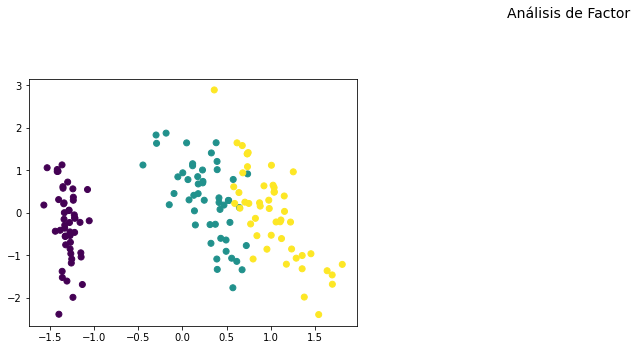

In [96]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
#**************************************************
# Cargando el dataset
iris = datasets.load_iris(as_frame=True)
#**************************************************
#Estandarización de las variables
scaler = StandardScaler()
iris_scalado = scaler.fit_transform(iris.data)
#**************************************************
chi_square_value,p_value=calculate_bartlett_sphericity(iris_scalado)
kmo_all,kmo_model=calculate_kmo(iris_scalado)
if p_value<0.05 and kmo_model>0.5:
    fa=FactorAnalysis(n_components=2)
    fa.fit(iris_scalado)
    iris_Transformed = fa.transform(iris_scalado)
    fig = plt.figure(figsize=(20,10))
    fig.suptitle("Análisis de Factor con el módulo Scikit-Learn", fontsize=14)
    ax = fig.add_subplot(2,3,1)
    ax.scatter(iris_Transformed[:,0], iris_Transformed[:,1], c=iris.target)
else:
    print("Sus datos no son adecuados para este tipo de técnica")
    print("Pues p_value es igual a "+str(p_value))
    print("y el valor de kmo es "+str(kmo_model))

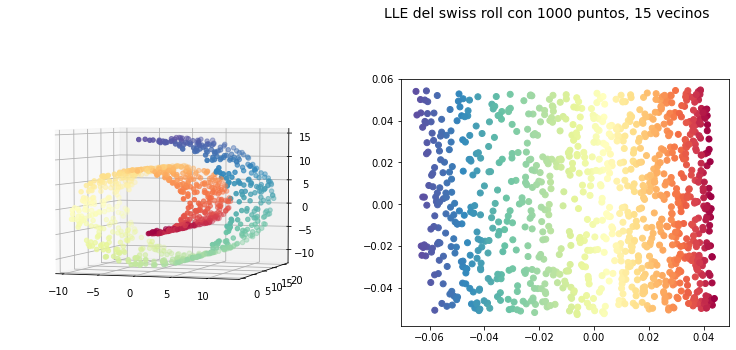

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding
#**************************************************
# Cargando el dataset
n_points = 1000
X, color = datasets.make_swiss_roll(n_points, random_state=0)
#**************************************************
fig = plt.figure(figsize=(20,10))
fig.suptitle("LLE del swiss roll con 1000 puntos, 15 vecinos", fontsize=14)
ax = fig.add_subplot(231, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
#********************************************************************************
lle= LocallyLinearEmbedding(n_neighbors=15, n_components=2,method='modified')
X_transformed=lle.fit_transform(X)
ax = fig.add_subplot(2, 3, 2)
ax.scatter(X_transformed[:, 0], X_transformed[:, 1],c=color, cmap=plt.cm.Spectral)


LLE: 0.41 sec
t-SNE: 4.8 sec
PCA: 0.0017 sec


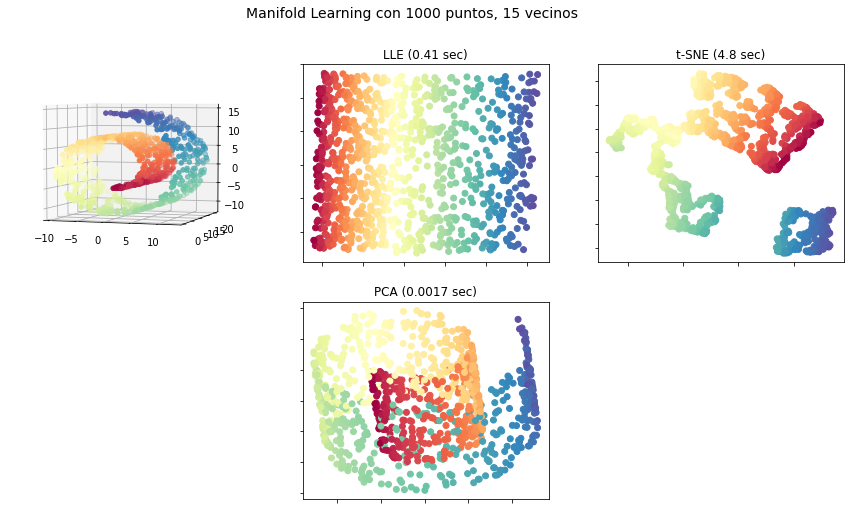

In [101]:
#Importamos las librerías que necesitamos
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.decomposition import PCA
#********************************************************************************
#Ahora cargamos el dataset swiss
n_points = 1000
X, color = datasets.make_swiss_roll(n_points, random_state=0)
# Mostramos los datos originales del dataset
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning con %i puntos, %i vecinos"
             % (1000, 15), fontsize=14)
# Añadimos la gráfica 3D
ax = fig.add_subplot(231, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
# Creamos un diccionario que contiene los métodos LLE, t-SNE and PCA
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors=15, n_components=2, eigen_solver='auto')
methods = OrderedDict()
methods['LLE'] = LLE(method='modified')
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)
methods['PCA']=PCA(n_components=2)
# Mostramos los resultados
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 3, 2 + i+(i>1))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
plt.show()

In [107]:
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
#****************************************************************
iris = datasets.load_iris()
irisDF = pd.DataFrame(iris.data)
#****************************************************************
v0=np.var(iris.data[0])
print("Varianza 0:"+str(v0))
v1=np.var(iris.data[1])
print("Varianza 0:"+str(v1))
v2=np.var(iris.data[2])
print("Varianza 0:"+str(v2))
v3=np.var(iris.data[3])
print("Varianza 0:"+str(v3))
scaler = StandardScaler()
dataScalada=scaler.fit_transform(iris.data)
v01=np.var(dataScalada[0])
print("Varianza 01:"+str(v01))
v_thr = VarianceThreshold(0.5)
data= v_thr.fit_transform(dataScalada)
data


Varianza 0:3.562499999999999
Varianza 0:3.1118750000000004
Varianza 0:2.9925
Varianza 0:2.7424999999999997
Varianza 0:0.9416660035748416


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      